## Observations and Insights 

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
num_mice = combined_data['Mouse ID'].nunique()
num_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicates = combined_data[combined_data.duplicated(['Mouse ID'])]
all_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.drop_duplicates(subset=['Mouse ID','Timepoint'], keep='first')
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice = clean_data['Mouse ID'].nunique()
num_mice

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen:
tum_vol_mean = clean_data['Tumor Volume (mm3)'].mean()
tum_vol_median = clean_data['Tumor Volume (mm3)'].median()
tum_vol_var = clean_data['Tumor Volume (mm3)'].var()
tum_vol_std = clean_data['Tumor Volume (mm3)'].std()
tum_vol_sem = clean_data['Tumor Volume (mm3)'].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_sort = clean_data.groupby(['Drug Regimen'])

tum_vol_mean_drug = drug_sort['Tumor Volume (mm3)'].mean()
tum_vol_median_drug = drug_sort['Tumor Volume (mm3)'].median()
tum_vol_var_drug = drug_sort['Tumor Volume (mm3)'].var()
tum_vol_std_drug = drug_sort['Tumor Volume (mm3)'].std()
tum_vol_sem_drug = drug_sort['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
regimen_summary = pd.DataFrame({
    "Mean": tum_vol_mean_drug,
    "Median": tum_vol_median_drug,
    "Variance": tum_vol_var_drug,
    "Standard Deviation": tum_vol_std_drug,
    "SEM": tum_vol_sem_drug,
})
regimen_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_sort['Tumor Volume (mm3)'].describe()

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,156.0,52.393463,6.568014,45.000000,47.046068,50.909965,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar and Pie Charts

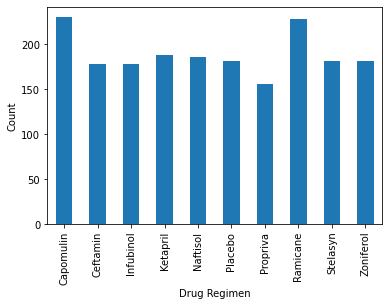

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_group_counts = drug_sort['Drug Regimen'].count()
drug_bar = drug_group_counts.plot(kind='bar')
drug_bar.set_ylabel("Count")
plt.show()

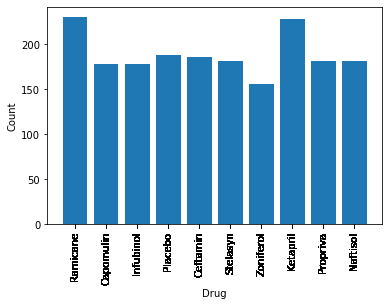

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
regimens= clean_data['Drug Regimen'].unique()
drug_bar2 = plt.bar(regimens, drug_group_counts, align="center")
plt.xticks(clean_data["Drug Regimen"], rotation=90)
plt.xlabel("Drug")
plt.ylabel("Count")
plt.show()

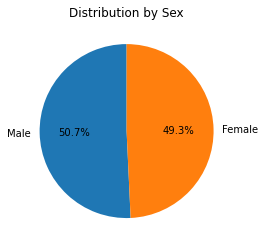

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_data = clean_data['Sex'].value_counts()
pie_plot = sex_data.plot.pie(autopct="%1.1f%%", startangle=90, title='Distribution by Sex')
pie_plot.set_ylabel('')
plt.show()

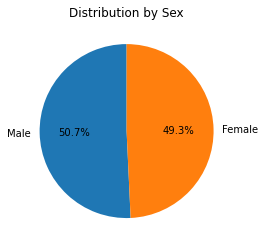

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_data, labels=sex_data.index.values, autopct="%1.1f%%", startangle=90)
plt.title('Distribution by Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Find max timepoint for each mouse
maxtime = pd.DataFrame(clean_data.groupby('Mouse ID')['Timepoint'].max().sort_values())
maxtime = maxtime.reset_index().rename(columns={'Timepoint': 'maxtime'})

# Merge max timepoint onto data_df
merged_data = pd.merge(clean_data, maxtime, how="left", on="Mouse ID")

merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,maxtime
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
drug_values = []

# Create loop
for drug in drugs:
    
    loop_df = merged_data.loc[merged_data['Drug Regimen'] == drug]
    
    maxtime_loop_df = loop_df.loc[loop_df['Timepoint'] == loop_df['maxtime']]
    
    # Add values to empty list
    drug_data = maxtime_loop_df['Tumor Volume (mm3)']
    drug_values.append(drug_data)
    
    # Calculate IQR and Outliers
    quartiles = drug_data.quantile([.25, .5, .75])
    quart1 = quartiles[0.25]
    quart3 = quartiles[0.75]
    iqr = quart3-quart1
    low_b = quart1-(1.5*iqr)
    up_b = quart3+(1.5*iqr)
    outliers = (drug_data.loc[(maxtime_loop_df['Tumor Volume (mm3)'] >= up_b) |  
                                        (maxtime_loop_df['Tumor Volume (mm3)'] <= low_b)]).count()
    # Print info
    print(f'The upper bound of {drug} is {up_b}')
    print(f'The lower bound of {drug} is {low_b}')
    print(f'The interquartile range of {drug} is {iqr}')
    print(f'The number of {drug} outliers is {outliers}')

The upper bound of Capomulin is 51.83201549
The lower bound of Capomulin is 20.70456164999999
The interquartile range of Capomulin is 7.781863460000004
The number of Capomulin outliers is 0
The upper bound of Ramicane is 54.30681135
The lower bound of Ramicane is 17.912664470000003
The interquartile range of Ramicane is 9.098536719999998
The number of Ramicane outliers is 0
The upper bound of Infubinol is 82.74144559000001
The lower bound of Infubinol is 36.83290494999999
The interquartile range of Infubinol is 11.477135160000003
The number of Infubinol outliers is 1
The upper bound of Ceftamin is 87.66645829999999
The lower bound of Ceftamin is 25.355449580000002
The interquartile range of Ceftamin is 15.577752179999997
The number of Ceftamin outliers is 0


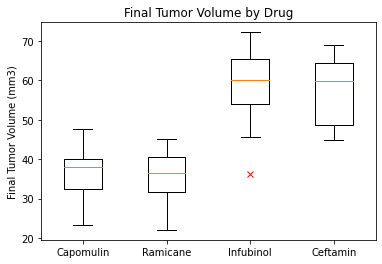

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Edit outliers on boxplot for visibility
flierprops = dict(marker='x', markersize=6, markeredgecolor='red')

# Plot boxplot
plt.boxplot(drug_values, flierprops=flierprops)

# Add title and labels to boxplot
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Mouse z969 Capomulin Treatment Response')

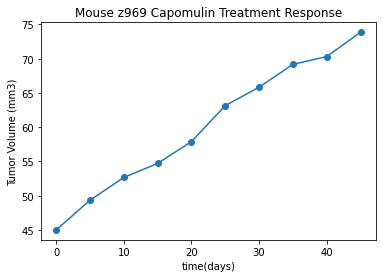

In [36]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse = clean_data.loc[clean_data['Mouse ID'] == 'z969']

cap_df = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin']

plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker = 'o')
plt.xlabel('time(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse z969 Capomulin Treatment Response')

y = 0.95x + 21.55
R-squared: 0.841936342469472


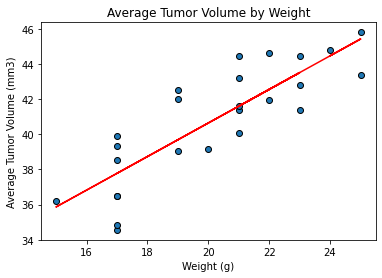

In [50]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_tumor_volume = pd.DataFrame(cap_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
                          .sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

avg_tumor_volume = pd.merge(cap_df, avg_tumor_volume, on='Mouse ID')
tumor_volume_final = avg_tumor_volume [['Weight (g)', 'avg_tumor_vol']].drop_duplicates()

x = tumor_volume_final['Weight (g)']
y = tumor_volume_final['avg_tumor_vol']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x, regress_values, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.scatter(x,y, edgecolor = 'black')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')

print(line_eq)
print(f'R-squared: {rvalue}')
plt.show()